In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


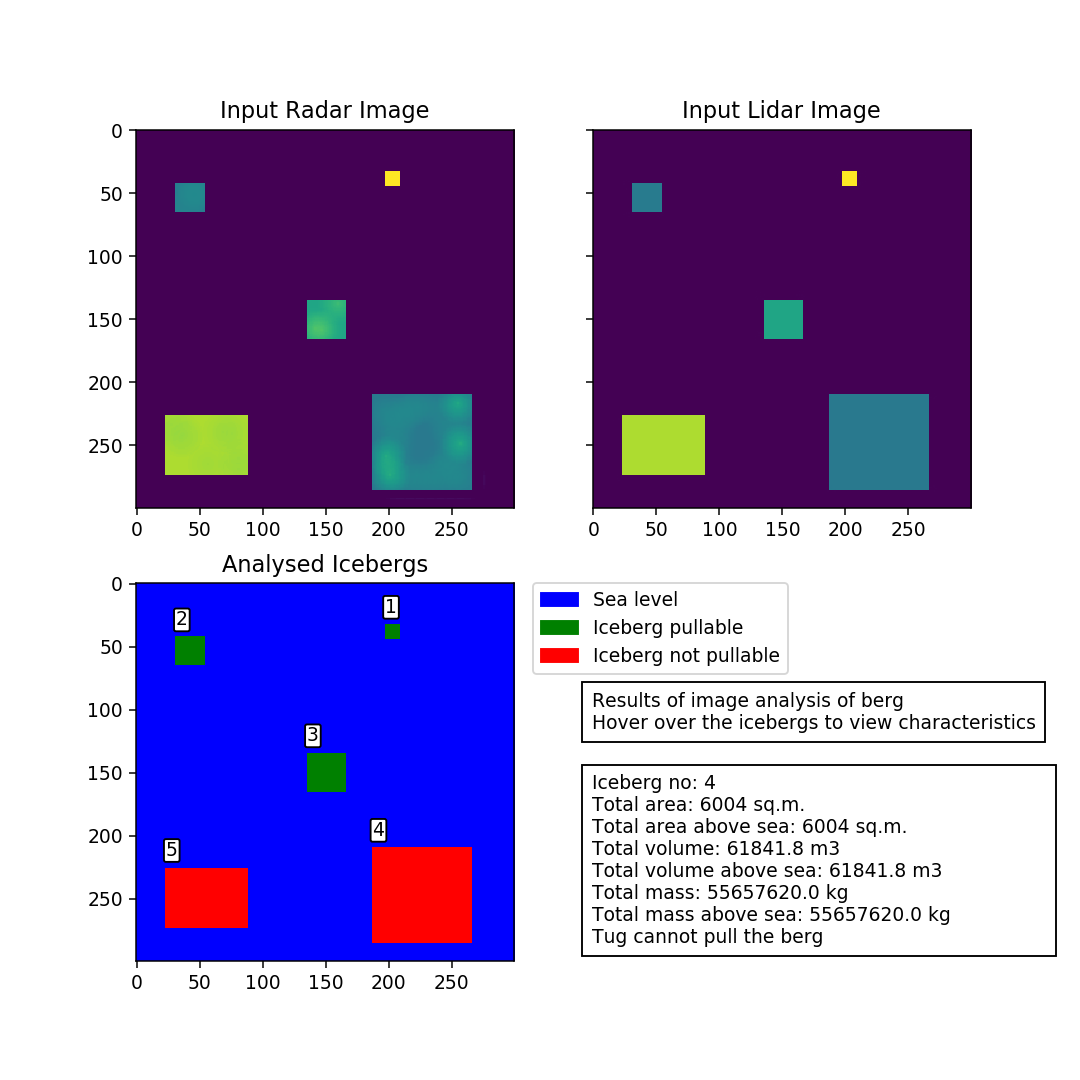

In [3]:
# -*- coding: utf-8 -*-
"""
Date Last Updated: 
    Mar 30, 2019

Author: 
    Orkhan Hajiyev (gy17oh)

Title: 
    Assignment 2. Module GEOG5991M
    White Star Line Project

Version: 
    2.0

Purpose: 
    To implement the requirements of the Assignment 2 of the Module GEOG5991M.
    The version was built to analyse the images with MULTIPLE icebergs.
    
    White Star Line was selected as the project to satisfy the assignment's
    description. The link to the project's problem definition:
    https://www.geog.leeds.ac.uk/courses/computing/
    study/core-python-odl/assessment2/ice.html
    
    Briefly, the goal is to analyse two raster files of the size 300 by 300 of 
    the radar and lidar images of the sea and identify the multiple bergs. 
    
License: 
    Copyright (c) 2019 Orkhan Hajiyev
    Lisence under MIT License
    License link: 
        https://github.com/ohajiyev/Assignment2/blob/master/LICENSE.md
       
Github Repo Link: 
    https://github.com/ohajiyev/Assignment2
    
Code Folder Link:
    https://github.com/ohajiyev/Assignment2/tree/master/python/src/unpackaged/
    ice/Version2

Zip file link:
    https://github.com/ohajiyev/Assignment2/tree/master/python/src/unpackaged/
    ice/Version2/assignment2.zip

Instructions to run:
    Download 'assignment2.zip' file and extract.
    The extracted folder should contain the following files and folders, as 
    minimum:
        'ice_v2.py' - main code to run from command prompt
        'icebergstructure.py' - Iceberg class definiton
        'imagesupport.py' - ImageHandle class definiton
        'ice2_notebook.ipynb' - Jupyter Notebook file
        'input' - folder which contains input images 'white2.lidar' and 
                  'white2.radar'
        'input/white2.lidar' - lidar image (300x300) of an area of sea with 
                               the multiple bergs. Values (0-255) contain 
                               height data of the objects
        'input/white2.radar' - radar image (300x300) of an area of sea with 
                               the multiple bergs. Values (0-255) contain 
                               information to idenitify the bergs (>=100)
        'output' - folder which is output folder for the result text file 
                   ('result.txt)
    Software requirements:
        Anaconda3 (64bit):
            Python 3.7
            Spyder 3.3.2
            Jupiter Notebook
            Anaconda prompt
        
    The code can be run in Anaconda command line, Spyder and Jupyter notebook.
        Anaconda cmd: 
            1. 'python ice_v2.py'
        Spyder: 
            1. Open 'ice_v2.py
            2. Ensure that IPython console is activated
            3. Run '#%matplotlib qt5' command in IPython console to interact
               with interface.
            4. Press 'F5' button or 'Run' from the  menu to run the code
        Jupyter Notebook:
            1. Open 'ice2_notebook.ipynb' in browser
            2. Run first line '%matplotlib notebook' to enable interaction
               with the output
            3. Press 'Run all' from Run menu
        
Limitations:
    The code only was tested and developed with/for available two sets of the 
    inputs provided by the University. It is assumed that the bergs data should 
    be continuous and without any gaps. Any gaps in input data may wrongly 
    identify the bergs. These are artificial files and in the reality
    no image can come ideally without any gaps or distortions. For real images
    the algorithms which is used to bergs identification hardly can be applied.
    For the real case object classification method of machine learning should
    be applied. Also the algorithm cannot differentiate the  bergs with 
    overlaps.
    
Evident improvements:
    Code can be improved by creating __init__ method in HandleImage
    class and be enhanced by using real GUI not relying only on matplotlib
    capability. Machine learning techniques can be implemented to improve
    identification of bergs.
    
Python version: 
    3.7 (Python 3.7.1 64-bit | Qt 5.9.6 | PyQt5 5.9.2 | Windows 10)

Coding Tool:
    Spyder Version 3.3.2

!!! Important note: some part of the code may be copied and modified from 
!!! different sources which are explicitly shown in the comments below
"""

#==============================================================================
# Import modules

#%matplotlib qt5 - please see instructions
import icebergstructure
import imagesupport

# End of Import modules
#==============================================================================


#==============================================================================
# Function definitions

def write_file(file_name, icebergs):    
    """ Write result of analysis into output file """
    
    # Try to write the result to the output file
    # Result is the list of the icebergs with calculated parameters
    try:
        with open(file_name, 'w') as file_object:
            file_object.write('Results of analysis\n\n') 
            for berg in icebergs:
                file_object.write(str(berg))   
                file_object.write('\n\n')
    except IOError as err:
        print(err)
    except:
        print("Unexpected error:", sys.exc_info()[0])

# End of Function definitions
#==============================================================================


###############################################################################    

""" Main function """
#==============================================================================
# Create variables and assign the default values to them

# empty list of data which contains texture of objects read from radar file 
radar_data_texture = []

# empty list of data which contains height of objects read from lidar file 
lidar_data_height = [] 

# empty list of Iceberg objects
icebergs = [] 

# numpy array contains unique integer value for each iceberg
iceberg_data = []

# quantity of the icebergs
iceberg_quantity = 0

# Define input file paths for multiple bergs
# Type of files is delimited by comma tex
lidar_data_file_path = 'input/white2.lidar'
radar_data_file_path = 'input/white2.radar'

# Define output text file path
output_file_path = 'output/results.txt'

# Create instance of the ImageHandle class
img_class_func = imagesupport.ImageHandle()

# End of Create variables
#==============================================================================


# Main part of the code
#==============================================================================

# Read input files and assign texture and height info to the variables
# lidar_data_height is numpy array and contains height of the objects
lidar_data_height = img_class_func.read_file(lidar_data_file_path)
# radar_data_texture is numpy array and contains texture of the objects
# to identify the icebergs
radar_data_texture = img_class_func.read_file(radar_data_file_path)

# Identify the mupltiple icebergs and quantity from the radar image
iceberg_data, iceberg_quantity = img_class_func.iceberg_identification(
        radar_data_texture)

# Create the Iceberg objects from the input image files
# On initialisation stage, the parameters, such as mass and volume of
# the iceberg is calculated
for iceberg_no in range(1, iceberg_quantity + 1):
    icebergs.append(icebergstructure.Iceberg(iceberg_data, 
                                             lidar_data_height,
                                             iceberg_no))

# Draw input images and result (both image and text) in the canvas
# and activate hovering fucntion to view the resultant text of the 
# specific iceberg
img_class_func.draw_result_multiple(iceberg_data, icebergs, 
                     radar_data_texture, 
                     lidar_data_height)

# Write the results of the analysis to text file
# icebergs list return the list of strings of overwritten method __str__
write_file(output_file_path, icebergs)

# End of Main part of the code
#==============================================================================
###############################################################################
